# Multiple linear regression and adjusted R-squared

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn
seaborn.set()

## Load the data

In [2]:
# Load the data from a .csv in the same folder
data = pd.read_csv('1.02. Multiple linear regression.csv')

In [3]:
# Let's check what's inside this data frame
data

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


In [4]:
# This method gives us very nice descriptive statistics.
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


## Create your first multiple regression

In [5]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data ['GPA']
# Similarly, our independent variable (x) is the SAT score
x1 = data [['SAT','Rand 1,2,3']]

In [6]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()

C:\Users\yorkc\Anaconda3\envs\python_r_jupyter\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [7]:
# Print a nice summary of the regression.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           6.58e-10
Time:                        10:51:55   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
dummy_data = pd.read_csv('1.03. Dummies.csv')

In [9]:
dummy_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


#### Yes will become 1
#### No will become 0

In [10]:
dummy_data_copy = dummy_data.copy()

In [12]:
dummy_data_copy['Attendance'] = dummy_data_copy['Attendance'].map({'Yes': 1, 'No': 0})

In [13]:
dummy_data_copy

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [14]:
dummy_data_copy.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [17]:
y = dummy_data_copy ['GPA']
# Similarly, our independent variable (x) is the SAT score
x1 = dummy_data_copy [['SAT','Attendance']]

In [18]:
# Add a constant. Esentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
results.summary()

C:\Users\yorkc\Anaconda3\envs\python_r_jupyter\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 29 Oct 2020   Prob (F-statistic):           2.19e-15
Time:                        15:14:11   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

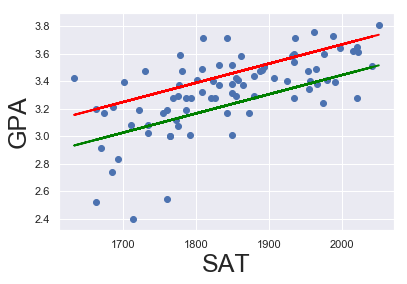

In [23]:
# Create a scatter plot
plt.scatter(dummy_data_copy ['SAT'],y)
# Define the regression equation, so we can plot it later
#y_hat_yes = 0.6439 + 0.0014 + 0.2226*1 *SAT ##formula from above
y_hat_yes = 0.8665 + 0.0014*dummy_data_copy ['SAT']
#y_hat_no = 0.6439 + 0.0014 + 0.2226*0  *SAT ##formula from above
y_hat_no = 0.6439 + 0.0014*dummy_data_copy ['SAT']

# Plot the regression line against the independent variable (SAT)
fig = plt.plot(dummy_data_copy ['SAT'],y_hat_yes, lw=2, c='red', label ='Attended')
fig = plt.plot(dummy_data_copy ['SAT'],y_hat_no, lw=2, c='green', label ='Did Not Attend')
# Label the axes
plt.xlabel('SAT', fontsize = 25)
plt.ylabel('GPA', fontsize = 25)
plt.show()

# Make Predictions Based on the Regressions Created

In [24]:
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


## We will predict Bob who got 1700 on the SAT but did not attend class 
## We will predict Alice who got a 1670 on the SAT and attended class

In [25]:
#create a new dataset with our prediction data
new_data = pd.DataFrame({'const': 1, 'SAT': [1700,1670], 'Attendance': [0, 1]})
new_data = new_data[['const', 'SAT', 'Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [26]:
#optionally rename columns
new_data.rename(index={0: 'Bob', 1: 'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [28]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [29]:
#Create a new df with predictions
predictions_df = pd.DataFrame({'Predictions': predictions})
#we will now join the data
joined_data = new_data.join(predictions_df)
joined_data.rename(index={0: 'Bob', 1: 'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
